<table align="center" >
<thead>
<tr>
<th>
<a  href="http://www.fsdmfes.ac.ma/">
<img src="https://github.com/m-elkhou/Deep_Learning/blob/master/assets/usmba.png?raw=1" width=70px />
</a>
</th>
<th>
<a  href="http://www.fsdmfes.ac.ma/">
<img src="https://github.com/m-elkhou/Deep_Learning/blob/master/assets/fsdm.png?raw=1" width=75px />
</a>
</th>
<th>
<a href="https://www.univ-paris13.fr/">
<img src="https://github.com/m-elkhou/Deep_Learning/blob/master/assets/uspn.png?raw=1" width=150px/>
</a>
</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center;">
<a   href="http://www.fsdmfes.ac.ma/">USMBA</a>
</td>
<td style="text-align:center;">
<a   href="http://www.fsdmfes.ac.ma/">FSDM</a>
</td>
<td style="text-align:center;">
<a  href="https://www.univ-paris13.fr/">USPN</a>
</td>
</tr>
</tbody>
</table>


***

# Deep Learning TP 3 : Cartes Auto-Organisatrices

***

</br>

**Réalisée par :**
- [Mohammed EL-KHOU](https://www.linkedin.com/in/m-elkhou/)
>- mohammed.elkhou1@usmba.ac.ma
>- m.elkhou@hotmail.com

- [Mohammed MAAZOUZ](https://www.linkedin.com/in/mohammed-maazouz/)
>- mohammed.maazouz@usmba.ac.ma

**Encadré par :**
- Mr. [Nistor Grozavu](https://lipn.univ-paris13.fr/~grozavu/)
>- nistor.grozavu@lipn.univ-paris13.fr
>- nistor.grozavu@gmail.com
***

<div align="left" >
<a href="https://colab.research.google.com/drive/1zPWl9o4OyMk4WWc_efKtm14k32WXz28I">
<img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory" />
</a>
<a href="https://github.com/m-elkhou/Deep_Learning/blob/master/DeepLearningTP3.ipynb">
<img align="left" src="https://badgen.net/badge/icon/Open%20in%20GitHub?icon=github&label" alt="Open in GitHub" title="View source on GitHub" />
</a>
<a href="https://drive.google.com/open?id=17BHrvv7gKZRsuEyk16IJbT1ZEyQz03Ng">
<img align="left"  src="https://drive.google.com/uc?id=1iXjMi7nPbX9ztSwrgKVj3VNJRn7vlKER" alt="Open in Google Drive" title="View source on Google Drive"/>
</a>
<br/>
</div>

## A) Installer SOM TOOLBOX


Nous utiliserons ici `SOMPY`, une bibliothèque python pour **SOM** disponible gratuitement sur [Github](https://github.com/sevamoo/SOMPY).

SOMPY est une bibliothèque Python pour une carte auto-organisée (SOM).

Autant que possible, la structure de SOM est similaire à ` somtoolbox ` dans Matlab.

- Clone the repository

In [4]:
!git clone https://github.com/sevamoo/SOMPY

fatal: destination path 'SOMPY' already exists and is not an empty directory.


- Allez dans: dossier SOMPY
- Installez le logiciel

In [32]:
%cd SOMPY
# !pip install .
!python setup.py install
%cd ..

D:\GitHub\Deep_Learning\SOMPY
running install
running bdist_egg
running egg_info
creating SOMPY.egg-info
writing SOMPY.egg-info\PKG-INFO
writing dependency_links to SOMPY.egg-info\dependency_links.txt
writing requirements to SOMPY.egg-info\requires.txt
writing top-level names to SOMPY.egg-info\top_level.txt
writing manifest file 'SOMPY.egg-info\SOURCES.txt'
reading manifest file 'SOMPY.egg-info\SOURCES.txt'
writing manifest file 'SOMPY.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
running build_py
creating build
creating build\lib
creating build\lib\sompy
copying sompy\codebook.py -> build\lib\sompy
copying sompy\decorators.py -> build\lib\sompy
copying sompy\neighborhood.py -> build\lib\sompy
copying sompy\normalization.py -> build\lib\sompy
copying sompy\sompy.py -> build\lib\sompy
copying sompy\__init__.py -> build\lib\sompy
creating build\lib\sompy\visualization
copying sompy\visualization\bmuhits.py -> build\lib\sompy\visualization


zip_safe flag not set; analyzing archive contents...


- Confirmez que la bibliothèque a été installée

In [37]:
!pip show SOMPY

Name: SOMPY
Version: 1.1
Summary: Self Organizing Maps Package
Home-page: UNKNOWN
Author: Vahid Moosavi and Sebastian Packmann
Author-email: UNKNOWN
License: UNKNOWN
Location: c:\python\python37\lib\site-packages
Requires: numpy, numexpr, scipy, scikit-learn
Required-by: 


In [1]:
import numpy as np
import random
from tqdm.notebook import tqdm
from glob import glob
import joblib
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import sompy
from sompy.sompy import SOMFactory
import matplotlib.pyplot as plt
%matplotlib inline

CACHEDIR=C:\Users\mhmh2\.matplotlib
Using fontManager instance from C:\Users\mhmh2\.matplotlib\fontlist-v310.json
Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
# Change your Notebook theme
from jupyterthemes import jtplot
jtplot.style()
plt.rcParams["figure.figsize"] = (12,7)

In [3]:
iris = datasets.load_iris()
data = iris.data
target = iris.target

data.shape, target.shape

((150, 4), (150,))

---

## B) Apprentissage de la carte


### Question 1:
> Faites un premier apprentissage sur les données iris, avec les options par défaut.


In [18]:
import sompy
mapsize = [20, 20]
som = sompy.SOMFactory.build(data, mapsize)
# som = sompy.SOMFactory.build(data, mapsize, mask=None, mapshape='planar', lattice='rect',
#                              normalization='var', initialization='pca', neighborhood='gaussian',
#                              training='batch', name='sompy')
# this will use the default parameters, but i can change the initialization and neighborhood methods
# verbose='debug' will print more, and verbose=None wont print anything
som.train(n_job=-1, verbose='info')

 Training...
 pca_linear_initialization took: 0.018000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 80

 epoch: 1 ---> elapsed time:  0.109000, quantization error: 0.478474

 epoch: 2 ---> elapsed time:  0.110000, quantization error: 0.434394

 epoch: 3 ---> elapsed time:  0.110000, quantization error: 0.396377

 epoch: 4 ---> elapsed time:  0.115000, quantization error: 0.387392

 epoch: 5 ---> elapsed time:  0.123000, quantization error: 0.383251

 epoch: 6 ---> elapsed time:  0.125000, quantization error: 0.378242

 epoch: 7 ---> elapsed time:  0.122000, quantization error: 0.375984

 epoch: 8 ---> elapsed time:  0.137000, quantization error: 0.371199

 epoch: 9 ---> elapsed time:  0.119000, quantization error: 0.367398

 epoch: 10 ---> elapsed time:  0.117000, quantization error: 0.363560

 epoch: 11 ---> elapsed time:  0.120000, quantization error: 0.360128

 epoch: 12 ---> elapsed time:  0.116000, quantization error: 0.358304

 epoch: 13 --

 epoch: 34 ---> elapsed time:  0.124000, quantization error: 0.149487

 epoch: 35 ---> elapsed time:  0.134000, quantization error: 0.149487

 epoch: 36 ---> elapsed time:  0.146000, quantization error: 0.149487

 epoch: 37 ---> elapsed time:  0.136000, quantization error: 0.149487

 epoch: 38 ---> elapsed time:  0.139000, quantization error: 0.149487

 epoch: 39 ---> elapsed time:  0.137000, quantization error: 0.149487

 epoch: 40 ---> elapsed time:  0.138000, quantization error: 0.149487

 epoch: 41 ---> elapsed time:  0.121000, quantization error: 0.149487

 epoch: 42 ---> elapsed time:  0.118000, quantization error: 0.149487

 epoch: 43 ---> elapsed time:  0.122000, quantization error: 0.149487

 epoch: 44 ---> elapsed time:  0.119000, quantization error: 0.149487

 epoch: 45 ---> elapsed time:  0.122000, quantization error: 0.149487

 epoch: 46 ---> elapsed time:  0.113000, quantization error: 0.149487

 epoch: 47 ---> elapsed time:  0.129000, quantization error: 0.149487

 epoch

### Question 2:
> Calculez les erreurs topologique et de quantification, ainsi que la pureté de la carte.


In [17]:
print('erreurs topologique : ', som.calculate_topographic_error())
print('erreurs quantification', som.calculate_quantization_error())

erreurs topologique :  0.0
erreurs quantification 0.06237631574122737


### Question 3: 
>Normalisez les données iris puis refaites un apprentissage et comparez avec le résultat précédent.


In [20]:
from sklearn.preprocessing import StandardScaler
#Then we normalize the data, a crucial step to the correct functioning of the SOM algorithm
dataSt = StandardScaler().fit_transform(data)

mapsize = [20, 20]
som = sompy.SOMFactory.build(dataSt, mapsize)
# som = sompy.SOMFactory.build(dataSt, mapsize, mask=None, mapshape='planar', lattice='rect',
#                               initialization='pca', neighborhood='gaussian',
#                              training='batch', name='sompy')
# this will use the default parameters, but i can change the initialization and neighborhood methods
# verbose='debug' will print more, and verbose=None wont print anything
som.train(n_job=-1, verbose='info')

 Training...
 pca_linear_initialization took: 0.010000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 80

 epoch: 1 ---> elapsed time:  0.111000, quantization error: 0.478474

 epoch: 2 ---> elapsed time:  0.126000, quantization error: 0.434394

 epoch: 3 ---> elapsed time:  0.159000, quantization error: 0.396377

 epoch: 4 ---> elapsed time:  0.119000, quantization error: 0.387392

 epoch: 5 ---> elapsed time:  0.121000, quantization error: 0.383251

 epoch: 6 ---> elapsed time:  0.140000, quantization error: 0.378242

 epoch: 7 ---> elapsed time:  0.141000, quantization error: 0.375984

 epoch: 8 ---> elapsed time:  0.141000, quantization error: 0.371199

 epoch: 9 ---> elapsed time:  0.109000, quantization error: 0.367398

 epoch: 10 ---> elapsed time:  0.110000, quantization error: 0.363560

 epoch: 11 ---> elapsed time:  0.111000, quantization error: 0.360128

 epoch: 12 ---> elapsed time:  0.123000, quantization error: 0.358304

 epoch: 13 --

 epoch: 34 ---> elapsed time:  0.116000, quantization error: 0.149487

 epoch: 35 ---> elapsed time:  0.111000, quantization error: 0.149487

 epoch: 36 ---> elapsed time:  0.122000, quantization error: 0.149487

 epoch: 37 ---> elapsed time:  0.132000, quantization error: 0.149487

 epoch: 38 ---> elapsed time:  0.133000, quantization error: 0.149487

 epoch: 39 ---> elapsed time:  0.137000, quantization error: 0.149487

 epoch: 40 ---> elapsed time:  0.126000, quantization error: 0.149487

 epoch: 41 ---> elapsed time:  0.131000, quantization error: 0.149487

 epoch: 42 ---> elapsed time:  0.136000, quantization error: 0.149487

 epoch: 43 ---> elapsed time:  0.125000, quantization error: 0.149487

 epoch: 44 ---> elapsed time:  0.115000, quantization error: 0.149487

 epoch: 45 ---> elapsed time:  0.128000, quantization error: 0.149487

 epoch: 46 ---> elapsed time:  0.148000, quantization error: 0.149487

 epoch: 47 ---> elapsed time:  0.148000, quantization error: 0.149487

 epoch

In [21]:
print('erreurs topologique : ', som.calculate_topographic_error())
print('erreurs quantification', som.calculate_quantization_error())

erreurs topologique :  0.07333333333333333
erreurs quantification 0.06237631574122741


### Question 4: 
> Faite un script qui apprends différentes cartes à partir d’un jeu de données en faisant
varier les paramètres d’apprentissages (Par exemple, le nombre de neurone ou la taille de
la carte, la topologie de la carte, la durée de l’apprentissage, l’initialisation, …).


In [37]:
from sompy.sompy import SOMFactory
import random
import joblib
from tqdm.notebook import tqdm

names = iris.feature_names
# Train the model with different parameters. The more, the better. Each iteration is stored in disk for further study
for i in tqdm(range(1000)):
    mapsize = [random.choice(list(range(15, 25))), random.choice(list(range(10, 15)))]
    sm = SOMFactory().build(data, mapsize= mapsize, normalization = 'var', 
                            initialization='random', component_names=names, lattice="hexa")
    sm.train(n_job=4, verbose=False, train_rough_len=100, train_finetune_len=100)
    joblib.dump(sm, "Model/model_{}.joblib".format(i))

Wall time: 0 ns


### Question 5:
> Le script doit aussi comparer les erreurs topologiques, les erreurs de quantification et la
pureté entre les différentes cartes pour proposer la combinaison de paramètres qui offre le
meilleur compromis.**

In [57]:
# Study the models trained and plot the errors obtained in order to select the best one
from glob import glob
topographic_error, quantization_error=[],[]
models_path = glob("Model/model*")
for model_filepath in tqdm(models_path):
    sm = joblib.load(model_filepath)
    topographic_error.append(sm.calculate_topographic_error())
    quantization_error.append(sm.calculate_quantization_error())

 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.108000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.107000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.111000 seconds
 find_bmu took: 0.108000 seconds
 find_bmu 

 find_bmu took: 0.103000 seconds
 find_bmu took: 0.108000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.326000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.107000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu 

 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.107000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.101000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.108000 seconds
 find_bmu took: 0.108000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.107000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.118000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.111000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu 

 find_bmu took: 0.103000 seconds
 find_bmu took: 0.108000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.117000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.109000 seconds
 find_bmu took: 0.107000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.109000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu 

 find_bmu took: 0.104000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.107000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.108000 seconds
 find_bmu took: 0.113000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu 

 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.112000 seconds
 find_bmu took: 0.126000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.101000 seconds
 find_bmu took: 0.120000 seconds
 find_bmu took: 0.144000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.119000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.108000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu took: 0.110000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu 

 find_bmu took: 0.102000 seconds
 find_bmu took: 0.119000 seconds
 find_bmu took: 0.149000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.108000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.108000 seconds
 find_bmu took: 0.107000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.109000 seconds
 find_bmu 

 find_bmu took: 0.130000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.107000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.110000 seconds
 find_bmu took: 0.109000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.112000 seconds
 find_bmu took: 0.107000 seconds
 find_bmu took: 0.110000 seconds
 find_bmu took: 0.116000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.119000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.108000 seconds
 find_bmu 

 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.138000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.111000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.107000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.117000 seconds
 find_bmu took: 0.108000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu 

 find_bmu took: 0.102000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu took: 0.112000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.109000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu 

 find_bmu took: 0.101000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.110000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.116000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.109000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.107000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.107000 seconds
 find_bmu took: 0.108000 seconds
 find_bmu took: 0.111000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu took: 0.111000 seconds
 find_bmu took: 0.119000 seconds
 find_bmu took: 0.111000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu 

 find_bmu took: 0.103000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.109000 seconds
 find_bmu took: 0.107000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.107000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu took: 0.108000 seconds
 find_bmu took: 0.105000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.103000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.107000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu 

 find_bmu took: 0.120000 seconds
 find_bmu took: 0.106000 seconds
 find_bmu took: 0.108000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.109000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.102000 seconds
 find_bmu took: 0.128000 seconds
 find_bmu took: 0.108000 seconds
 find_bmu took: 0.109000 seconds


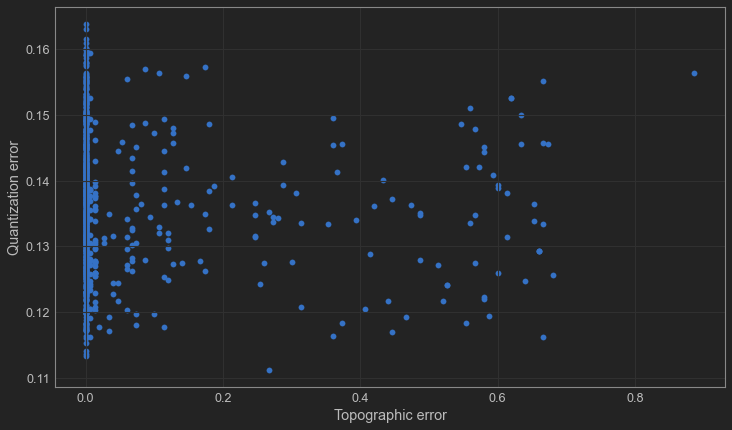

In [58]:
plt.scatter(topographic_error, quantization_error)
plt.xlabel("Topographic error")
plt.ylabel("Quantization error")
plt.show()

In [66]:
print(np.argmin(topographic_error), np.argmin(quantization_error))


0 104
0.0 0.11122104428285932


In [170]:
argmin = 0
for id, t_err in enumerate(topographic_error):
    if t_err == 0 and quantization_error[id] < quantization_error[argmin]:
        argmin = id
argmin

713

Sélectionnez manuellement le modèle avec de meilleures fonctionnalités. Dans ce cas, le modèle `#713` a été sélectionné car l'erreur de quantification est répartie sur 0.11 à 0.16 et l'erreur topographique varie beaucoup plus, de sorte que le modèle avec une erreur topographique plus faible a été sélectionné. Il est très important de maintenir l'erreur topographique aussi faible que possible pour assurer un prototypage correct.

In [15]:
selected_model = argmin # = 713
models_path = glob("Model/model*")
som = joblib.load(models_path[selected_model])
top_error = som.calculate_topographic_error()
quant_error = som.calculate_quantization_error()
print ("Topographic error = %s\n Quantization error = %s" % (top_error, quant_error))

 find_bmu took: 0.103000 seconds
 find_bmu took: 0.104000 seconds
 find_bmu took: 0.102000 seconds


Topographic error = 0.0
 Quantization error = 0.1132981037634211


---
## C) Visualisation

### Question 1: 
> Visualisez la carte avec les labels des données représentées. Chaque neurone doit être
colorié selon le label majoritaire.


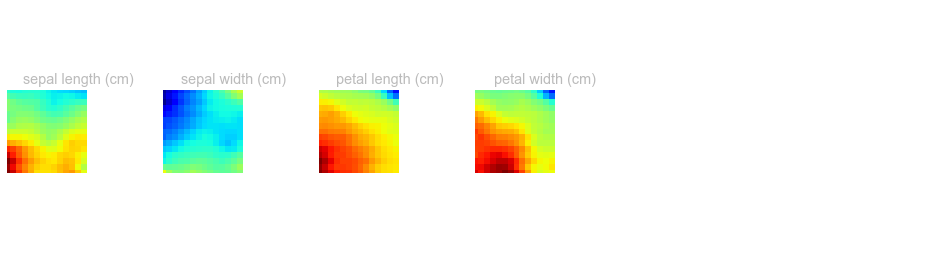

In [54]:
v = sompy.mapview.View2DPacked(10, 10, '',text_size=8)  
v.show(som, what='codebook', which_dim='all', cmap=plt.cm.jet)

### Question 2: 
> Visualisez la matrice des distances (U-matrix) et la matrice des distances médianes (Dmatrix).


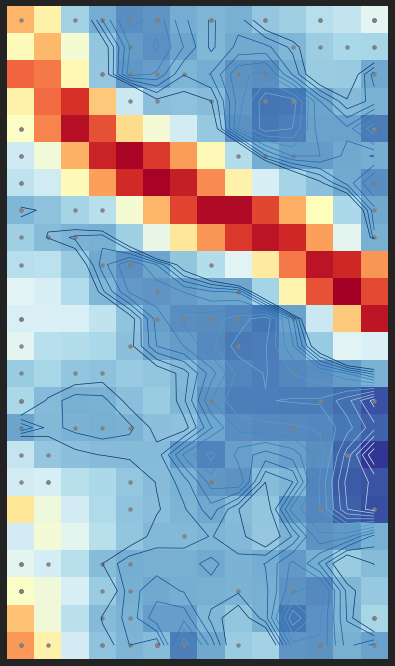

In [55]:
u = sompy.umatrix.UMatrixView(100, 100, 'umatrix', show_axis=True, text_size=8, show_text=True)
# This is the Umat value
UMAT  = u.build_u_matrix(som, distance=2, row_normalized=False)
# Here you have Umatrix plus its render
UMAT = u.show(som, distance2=2, row_normalized=False, show_data=True, contooor=True, blob=False)

### Question 3:
> Visualisez les valeurs des neurones dans chacune des 4 dimensions dans 4 figures.
Comment décririez-vous les 3 clusters en fonction de ces visualisations ?


locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000023B8A8D4948>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000023B8A8D4948>
Setting pcolormesh
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000023B8BA49C88>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000023B8BA49C88>
Setting pcolormesh
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000023B8BAC7108>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000023B8BAC7108>
Setting pcolormesh
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000023B8BC61F48>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000023B8BC61F48>
Setting pcolormesh


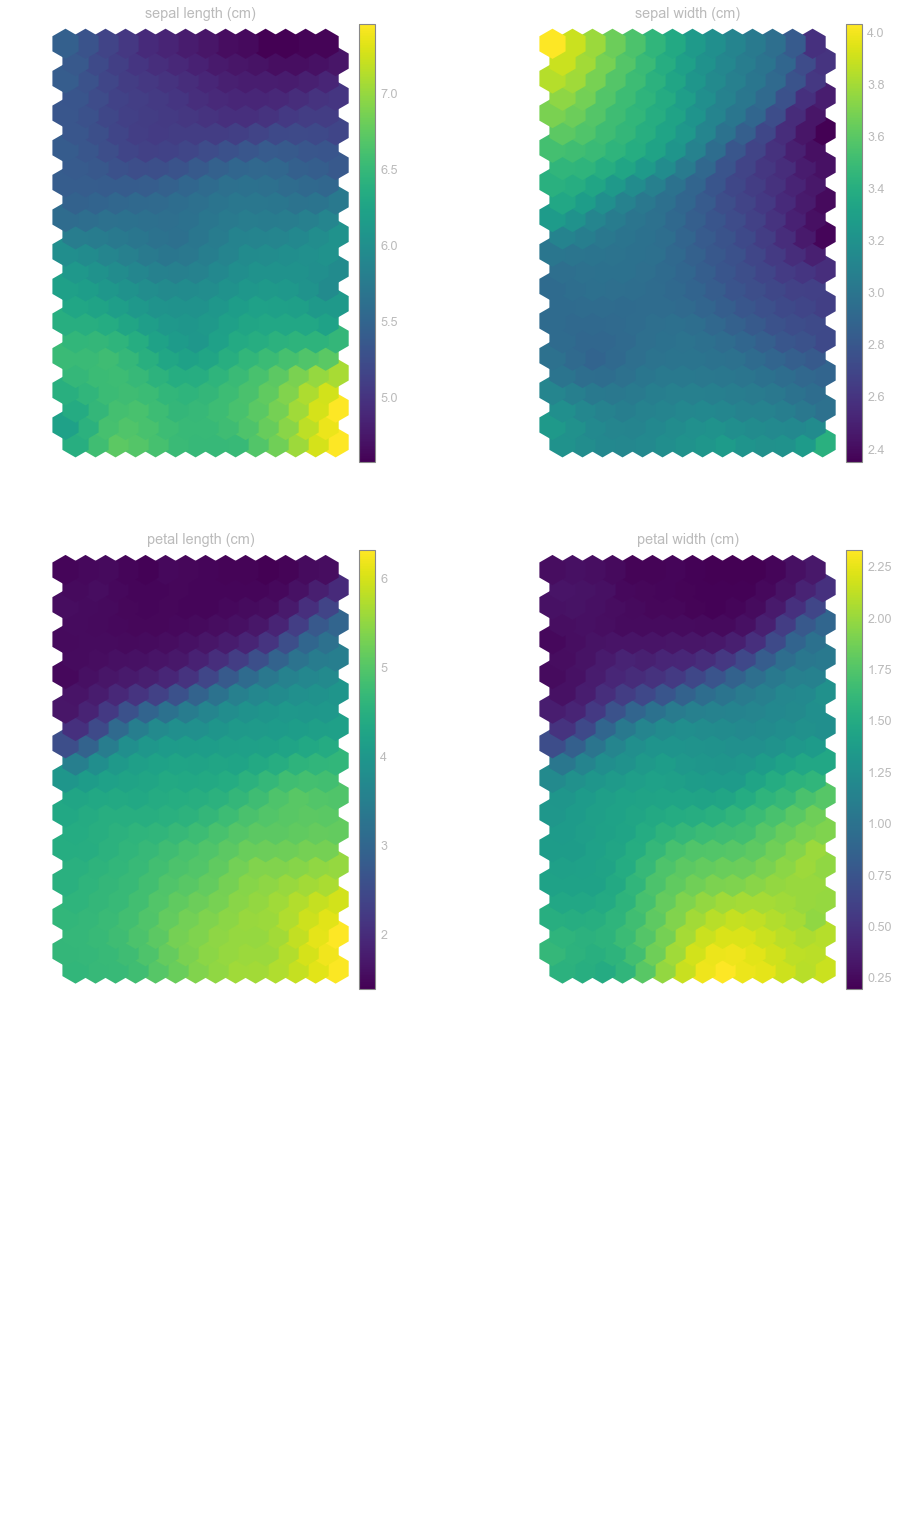

In [57]:
from sompy.visualization.mapview import View2D

view2D  = View2D(10,10,"", text_size=7.)
view2D.show(som, col_sz=2, which_dim="all", denormalize=True)

-  Pour les 2 dimensions de la variable sepal , on construit que les donnes IRIS peut devise par 2 class. Alor que , 
- Pour les 2 dimensions de la variable petal , on construit que les donnes peut bien div ise sur 3 class.

### Question 4: 
> Faites la même chose en une seule figure, mais de trois façons différentes.

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000023B8CA99248>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000023B8CA99248>
Setting pcolormesh


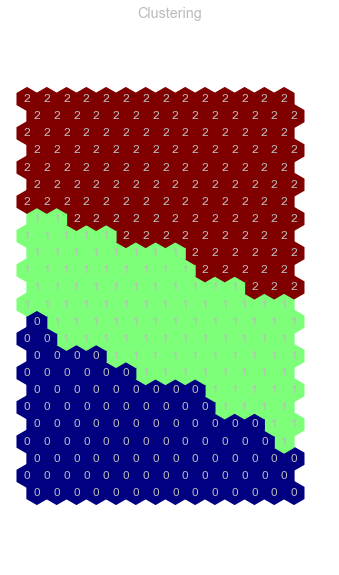

In [59]:
from sompy.visualization.hitmap import HitMapView

som.cluster(3)
hits = HitMapView(10, 10, "Clustering", text_size=7)
hits.show(som, labelsize=12)

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000023B8CC63DC8>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x0000023B8CC63DC8>
Setting pcolormesh


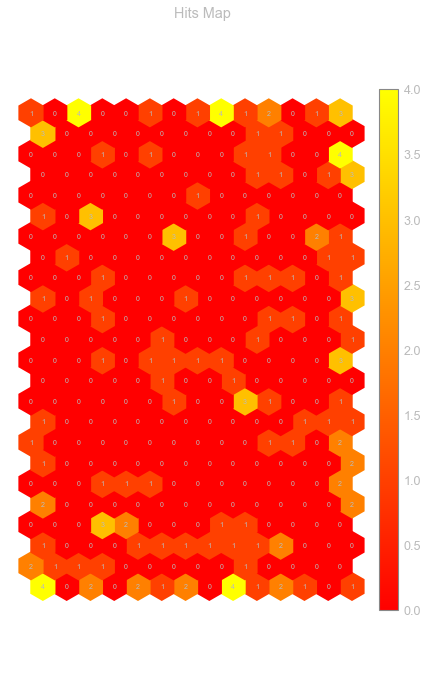

In [61]:
from sompy.visualization.bmuhits import BmuHitsView
#sm.codebook.lattice="rect"
vhts  = BmuHitsView(12,12,"Hits Map",text_size=7)
vhts.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn", logaritmic=False)
plt.show()


locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001970DFBF608>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001970DFBF608>
Setting pcolormesh


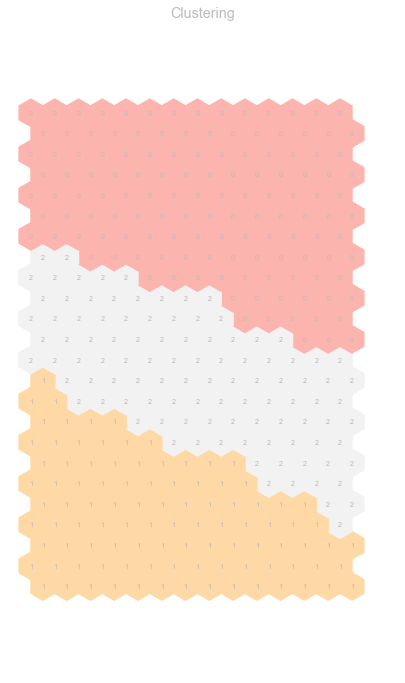

In [156]:
from sompy.visualization.hitmap import HitMapView

hits = HitMapView(12, 12,"Clustering",text_size=10, cmap=plt.cm.jet)
a=hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

### Question 5: 
> Projetez les données iris en deux et trois dimensions avec une ACP, puis projetez les
prototypes sur ces figures. Donnez une couleur à chaque point de donnée en fonction de
son label.


In [40]:
som.codebook.mapsize

[24, 14]

#### Pour pca 3

In [95]:
from sklearn.decomposition import PCA
PCA = PCA(3)
data_tr = PCA.fit_transform(data)

mapsize = [24, 14]
# som1 = SOMFactory.build(data_tr, mapsize, mask=None, mapshape='planar', lattice='rect',
#                              normalization='var', initialization='pca', neighborhood='gaussian',
#                              training='batch', name='sompy')
som1 = SOMFactory().build(data_tr, mapsize= mapsize, normalization = 'var', 
                            initialization='random', lattice="hexa")
som1.train(n_job=4, verbose=False, train_rough_len=100, train_finetune_len=100)

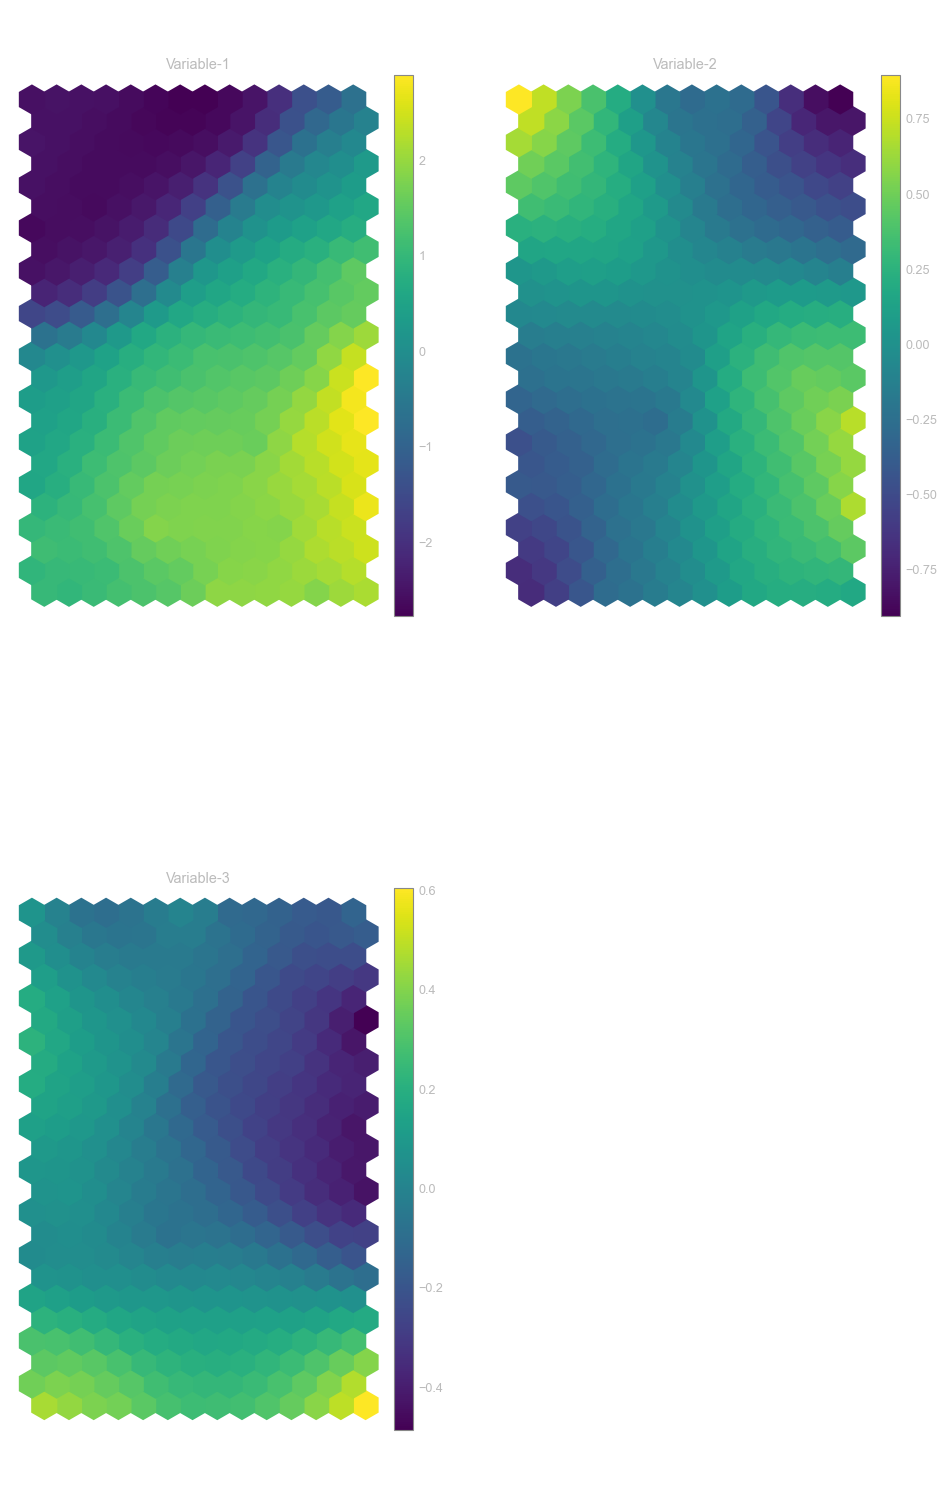

In [96]:
from sompy.visualization.mapview import View2D

view2D  = View2D(10,10,"", text_size=7.)
view2D.show(som1, col_sz=2, which_dim="all", denormalize=True)

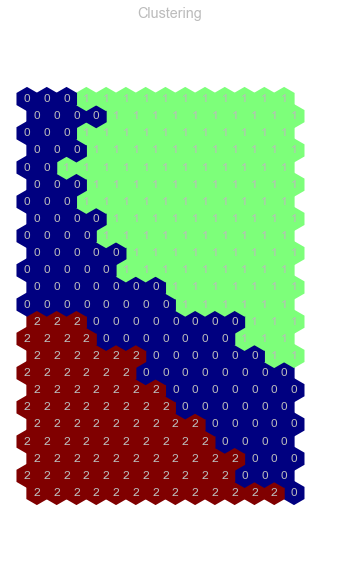

In [97]:
from sompy.visualization.hitmap import HitMapView

som1.cluster(3)
hits = HitMapView(10, 10, "Clustering", text_size=7)
hits.show(som1, labelsize=12)

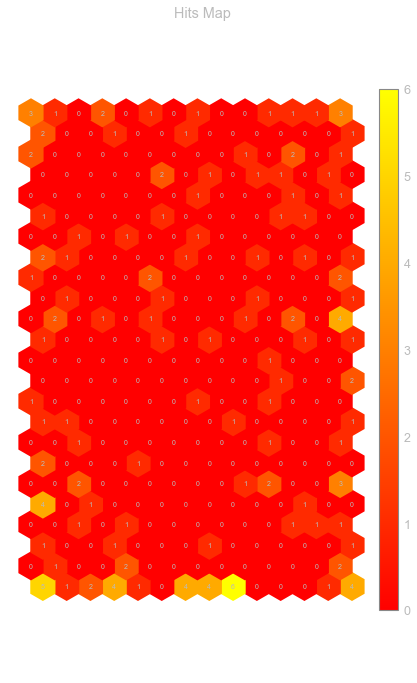

In [98]:
from sompy.visualization.bmuhits import BmuHitsView

vhts = BmuHitsView(12, 12, "Hits Map", text_size=7)
vhts.show(som1, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn", logaritmic=False)
plt.show()

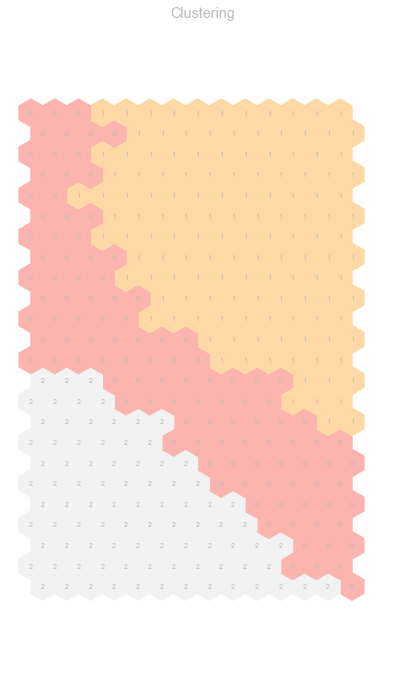

In [99]:
from sompy.visualization.hitmap import HitMapView

hits = HitMapView(12, 12,"Clustering",text_size=10, cmap=plt.cm.jet)
a=hits.show(som1, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

#### Pour pca 2

In [100]:
from sklearn.decomposition import PCA
PCA = PCA(2)
data_tr = PCA.fit_transform(data)

mapsize = [24, 14]
# som1 = SOMFactory.build(data_tr, mapsize, mask=None, mapshape='planar', lattice='rect',
#                              normalization='var', initialization='pca', neighborhood='gaussian',
#                              training='batch', name='sompy')
som2 = SOMFactory().build(data_tr, mapsize= mapsize, normalization = 'var', 
                            initialization='random', lattice="hexa")
som2.train(n_job=4, verbose=False, train_rough_len=100, train_finetune_len=100)

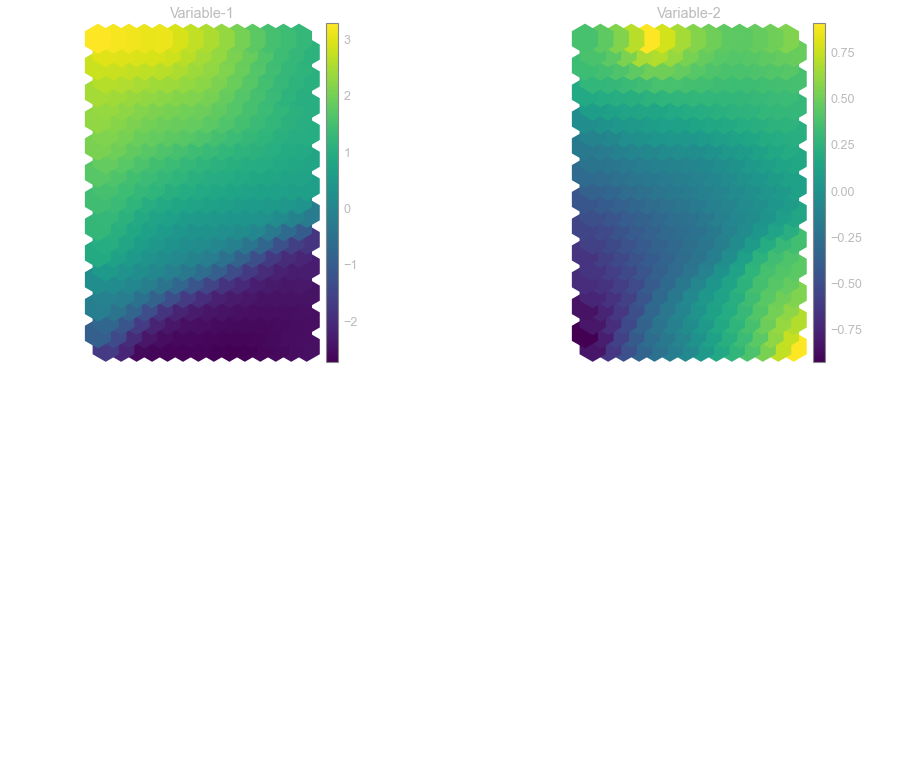

In [101]:
from sompy.visualization.mapview import View2D

view2D  = View2D(10,10,"", text_size=7.)
view2D.show(som2, col_sz=2, which_dim="all", denormalize=True)

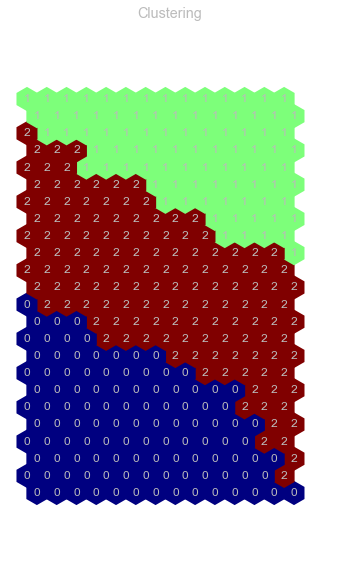

In [106]:
from sompy.visualization.hitmap import HitMapView

som2.cluster(3)
hits = HitMapView(10, 10, "Clustering", text_size=7)
hits.show(som2, labelsize=12)

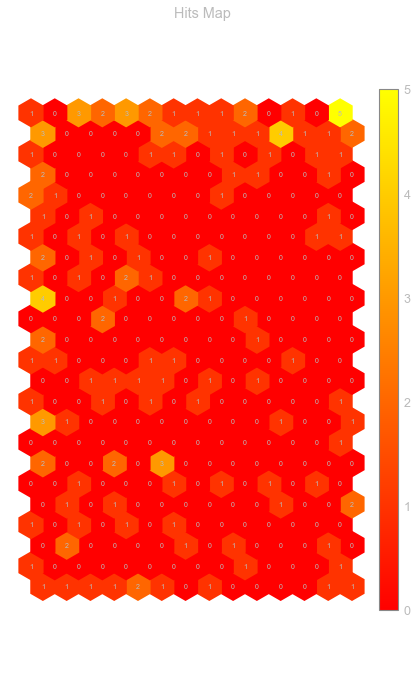

In [107]:
from sompy.visualization.bmuhits import BmuHitsView

vhts = BmuHitsView(12, 12, "Hits Map", text_size=7)
vhts.show(som2, anotate=True, onlyzeros=False, labelsize=7, cmap="autumn", logaritmic=False)
plt.show()

### Question 6: 
> Modifiez le script précédent pour visualiser les mises à jour des prototypes en 3D au
cours de l’apprentissage et en ajoutant des visualisations des résultats pour la meilleure
combinaison de paramètres.

---

## D) Clustering à deux niveaux

### Question 1: 
>Effectuez un clustering des données iris avec les algorithmes K-means et clustering hiérarchique. Testez différents paramètres.

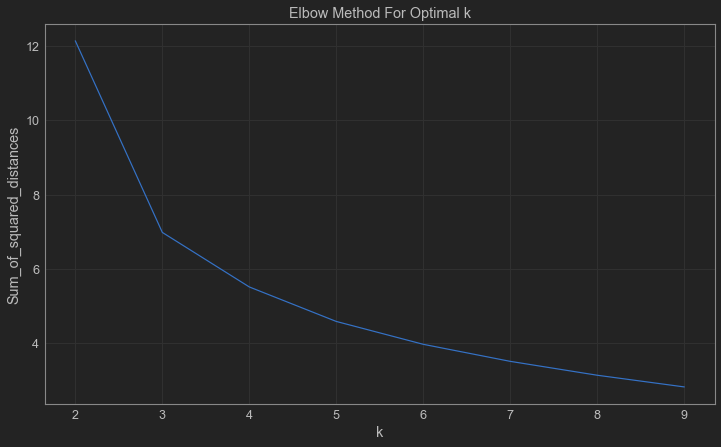

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def k_best(data, k_range):
    mms = MinMaxScaler()
    data_transformed = mms.fit_transform(data)

    clusters = []
    Sum_of_squared_distances = []
    for k in k_range:
        km = KMeans(n_clusters=k)
        km = km.fit(data_transformed)
        clusters.append(km.predict(data_transformed))
        Sum_of_squared_distances.append(km.inertia_)

    plt.plot(k_range, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    
k_best(data, range(2,10))

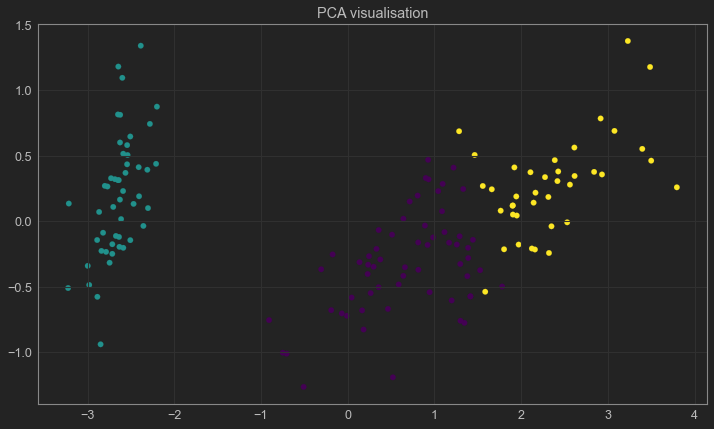

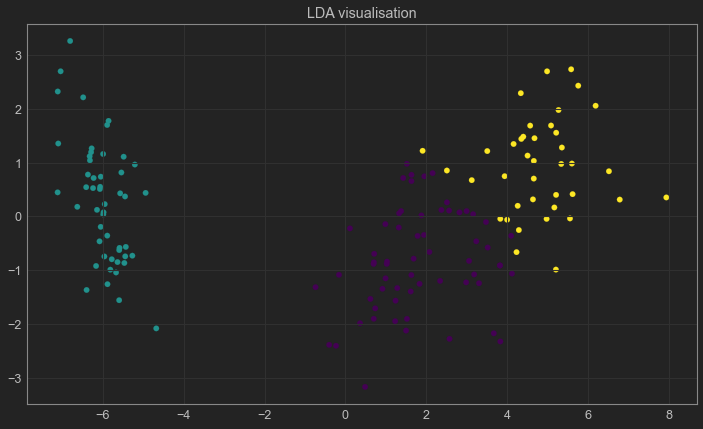

In [17]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

def plot_cluster(data, k):    
    mms = MinMaxScaler()
    data_transformed = mms.fit_transform(data)
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    cluster = km.predict(data_transformed)

    pca = PCA(n_components=2)
    xPCA = pca.fit(data).transform(data)
    plt.title('PCA visualisation')
    plt.scatter(xPCA[:, 0], xPCA[:, 1], c=cluster, cmap='viridis')
    plt.show()

    lda = LinearDiscriminantAnalysis(n_components=2)
    xLDA = lda.fit(data, cluster).transform(data)
    plt.title('LDA visualisation')
    plt.scatter(xLDA[:, 0], xLDA[:, 1], c=cluster, cmap='viridis')
    plt.show()
    return cluster
    
cluster = plot_cluster(data, 3)

In [18]:
mms = MinMaxScaler()
data_transformed = mms.fit_transform(data)
km = KMeans(n_clusters=3)
km = km.fit(data_transformed)
cluster1 = km.predict(data_transformed)
cluster1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

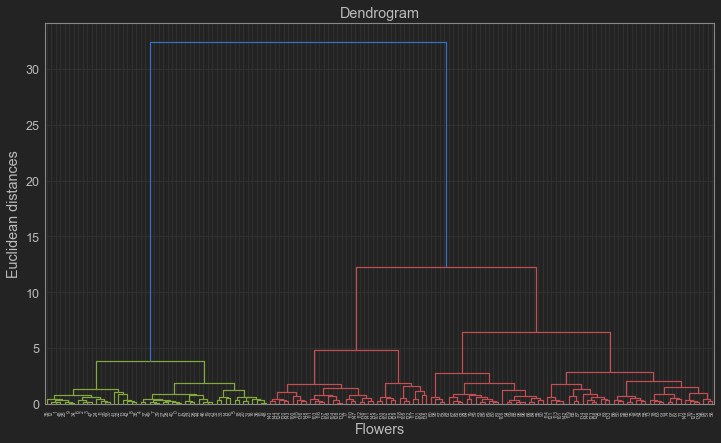

In [19]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Flowers')
plt.ylabel('Euclidean distances')
plt.show()

L'axe des x comprend les différents type de fleur et l'axe des y la distance euclidienne entre les clusters. Comment déterminer le nombre optimal de clusters à partir de ce diagramme? Nous recherchons la plus grande distance que nous pouvons verticalement sans traverser aucune ligne horizontale . Comptons le nombre de lignes sur le diagramme et déterminons le nombre optimal de clusters. Le numéro de cluster sera 3 pour cet ensemble de données.

In [20]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
cluster2 = hc.fit_predict(data)
cluster2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

### Question 2: 
> Ecrivez une petite fonction permettant de calculer le pourcentage de paires de données
correctement classé dans un même groupe ou dans des groupes différents. En déduire le
meilleur algorithme et les meilleurs paramètres à utiliser pour ces données.


Si l'étiquette est inconnu

In [21]:
from sklearn import metrics
score = metrics.silhouette_score(data, cluster1)
print("> silhouette_score pour k-means \t\t= ", score )
score = metrics.silhouette_score(data, cluster2)
print("> silhouette_score pour clustering hiérarchique = ", score )

> silhouette_score pour k-means 		=  0.5495805406956187
> silhouette_score pour clustering hiérarchique =  0.5543236611296415


Si l'étiquette est connu

In [22]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score

def calculate_accuracy(y, yhat):
    predict_labels = np.zeros_like(y)
    for i in range(len(np.unique(y))):
        mask = (yhat == i)
        
        predict_labels[mask] = mode(y[mask])[0]
#     print(y, "\n\n",yhat,'\n\n', predict_labels)
#     print("accuracy_score = ", accuracy_score(y, predict_labels), "%")
    return accuracy_score(y, predict_labels)

In [23]:
print("> accuracy_score pour k-means \t\t= ", calculate_accuracy(target, cluster1),'%')
print("> accuracy_score pour clustering hiérarchique = ", calculate_accuracy(target, cluster2), '%')

> accuracy_score pour k-means 		=  0.8866666666666667 %
> accuracy_score pour clustering hiérarchique =  0.8933333333333333 %


### Question 3:
> Appliquez le clustering sur les prototypes de la carte au lieu des données elles-mêmes,
puis associez chaque donnée à un cluster (clustering à deux niveaux). Comparez les
résultats obtenus.


locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000229163EAC08>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x00000229163EAC08>
Setting pcolormesh
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'De

findfont: score(<Font 'Century Gothic' (GOTHICI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Corbel' (corbel.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Arial' (ariblk.ttf) normal normal black normal>) = 3.858333333333333
findfont: score(<Font 'Felix Titling' (FELIXTI.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Wide Latin' (LATINWD.TTF) normal normal 400 expanded>) = 10.25
findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEBO.TTF) oblique normal bold normal>) = 11.335
findfont: score(<Font 'Segoe UI' (segoeuil.ttf) normal normal light normal>) = 10.24
findfont: score(<Font 'Britannic Bold' (BRITANIC.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'Traditional Arabic' (trado.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal regular normal>) = 10.05
findfont: score(<Font 'Trebuchet MS' (trebucbd.ttf) normal normal bold normal>) = 10.335
findfont: score(<Font 'Luci

findfont: score(<Font 'French Script MT' (FRSCRIPT.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Century Schoolbook' (CENSCBK.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'Forte' (FORTE.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Eras Medium ITC' (ERASMD.TTF) normal normal medium normal>) = 10.145
findfont: score(<Font 'Adobe Devanagari' (AdobeDevanagari-BoldItalic.otf) italic normal bold normal>) = 11.335
findfont: score(<Font 'Agency FB' (AGENCYR.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal book normal>) = 10.05
findfont: score(<Font 'MingLiU-ExtB' (mingliub.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe Print' (segoepr.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'MS Gothic' (msgothic.ttc) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Californian FB' (CALIFI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font '

findfont: score(<Font 'Old English Text MT' (OLDENGL.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal roman normal>) = 11.145
findfont: score(<Font 'Cambria' (cambriai.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Calibri' (calibrili.ttf) italic normal light normal>) = 11.24
findfont: score(<Font 'Simplified Arabic Fixed' (simpfxo.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Segoe UI' (segoeui.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Sitka Small' (SitkaB.ttc) normal normal bold normal>) = 10.335
findfont: score(<Font 'Monotype Corsiva' (MTCORSVA.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Calisto MT' (CALISTI.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Snap ITC' (SNAP____.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Georgia' (georgiai.t

findfont: score(<Font 'Myanmar Text' (mmrtext.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Rage Italic' (RAGE.TTF) italic normal 400 normal>) = 11.05
findfont: score(<Font 'Segoe UI' (seguibl.ttf) normal normal black normal>) = 10.525
findfont: score(<Font 'Kristen ITC' (ITCKRIST.TTF) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Montserrat' (Montserrat-Regular.ttf) normal normal regular normal>) = 10.05
findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bodoni MT' (BOD_CI.TTF) italic normal 400 condensed>) = 11.25
findfont: score(<Font 'Californian FB' (CALIFB.TTF) normal normal bold normal>) = 10.335
findfont: score(<Font 'TeamViewer14' (teamviewer14.otf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Constantia' (constanz.ttf) italic normal bold normal>) = 11.335
findfont: score(<Font 'Leelawadee UI' (LeelawUI.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'Bernard

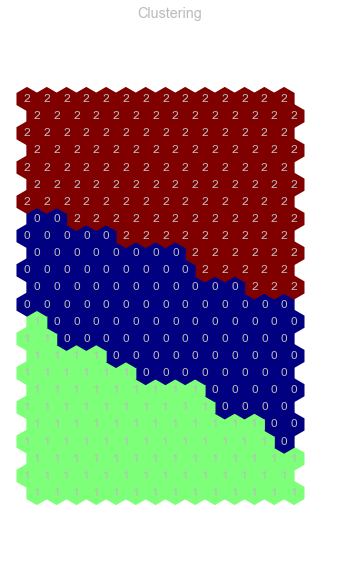

In [24]:
from sompy.visualization.hitmap import HitMapView

som.cluster(3)
hits = HitMapView(10, 10, "Clustering", text_size=7)
hits.show(som, labelsize=12)

In [25]:
map_labels = som.cluster(n_clusters=3)
data_labels = np.array([map_labels[int(k)] for k in som._bmu[0]])
data_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
score = metrics.silhouette_score(data, data_labels)
print("> silhouette_score pour SOM = ", score )
print("> accuracy_score pour SOM = ", calculate_accuracy(target, data_labels), '%')

> silhouette_score pour SOM =  0.5188012978978563
> accuracy_score pour SOM =  0.8866666666666667 %


### Question 4:
> Modifiez le script précédent pour faire un clustering à deux niveaux pour chaque
combinaison des paramètres. Le script doit utiliser la fonction de comparaisons de la
question 3 pour fournir le meilleur résultat de clustering.


In [27]:
# Study the models trained and plot the errors obtained in order to select the best one
from glob import glob
silhouette_score = []
accuracy = []
models_path = glob("Model/model*")
for model_filepath in tqdm(models_path):
    sm = joblib.load(model_filepath)

    map_labels = sm.cluster(n_clusters=3)
    data_labels = np.array([map_labels[int(k)] for k in sm._bmu[0]])
    
    acc = calculate_accuracy(target, data_labels)
    accuracy.append(acc)

    score = metrics.silhouette_score(data, data_labels)
    silhouette_score.append(score)

In [32]:
print("> best silhouette_score pour SOM = ", np.max(silhouette_score))
print("> best accuracy_score pour SOM = ", np.max(accuracy))
sm = joblib.load(models_path[np.argmax(accuracy)])
map_labels = sm.cluster(n_clusters=3)
data_labels = np.array([map_labels[int(k)] for k in sm._bmu[0]])
data_labels

> best silhouette_score pour SOM =  0.5204755431653806
> best accuracy_score pour SOM =  0.94


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
sm.codebook.mapsize

[23, 13]

### Question 5: 
> Le script doit aussi proposer des visualisations de ce clustering au niveau des neurones et au niveau des données.

#### Visualisations de ce clustering au niveau des neurones 

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000002291A32CA88>
Using auto colorbar locator on colorbar
locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000002291A32CA88>
Setting pcolormesh


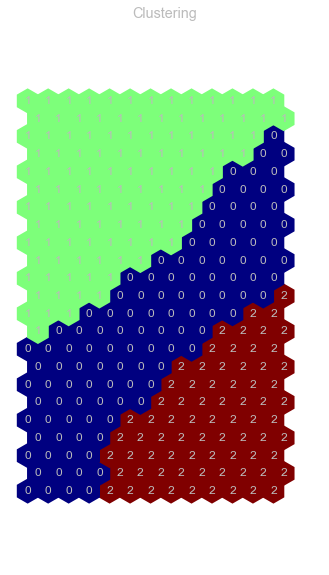

In [33]:
sm.cluster(3)
hits = HitMapView(10, 10, "Clustering", text_size=7)
hits.show(sm, labelsize=12)

#### Visualisations de ce clustering au niveau des données.

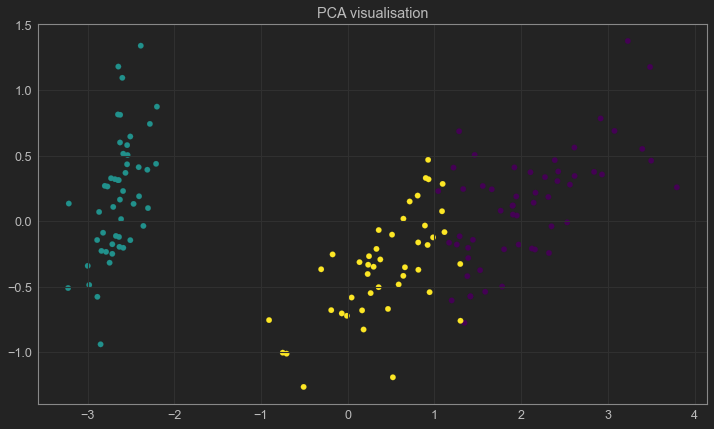

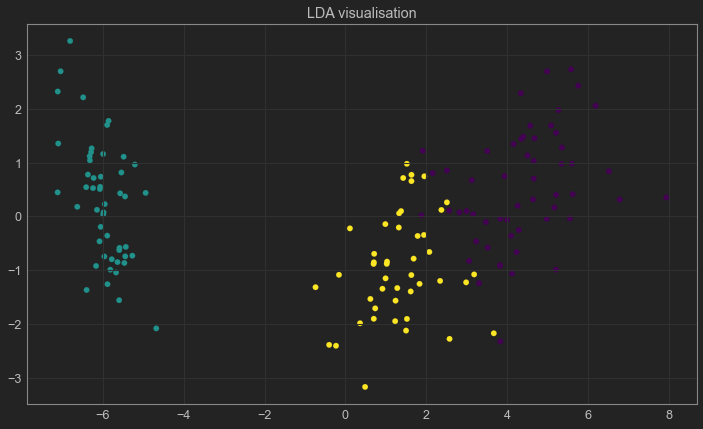

In [36]:
pca = PCA(n_components=2)
xPCA = pca.fit(data).transform(data)
plt.title('PCA visualisation')
plt.scatter(xPCA[:, 0], xPCA[:, 1], c=data_labels, cmap='viridis')
plt.show()

lda = LinearDiscriminantAnalysis(n_components=2)
xLDA = lda.fit(data, cluster).transform(data)
plt.title('LDA visualisation')
plt.scatter(xLDA[:, 0], xLDA[:, 1], c=data_labels, cmap='viridis')
plt.show()
